In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Set paths
data_dir = 'D:\\brain_tumor_dataset'

In [3]:
# Parameters
img_height, img_width = 150, 150
batch_size = 32

In [4]:
# Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [5]:
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [123]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=17
)

loss, accuracy = model.evaluate(val_gen)
print(f"\nTotal Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 475ms/step - accuracy: 0.8442 - loss: 0.3652 - val_accuracy: 0.7800 - val_loss: 0.5136
Epoch 2/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.8439 - loss: 0.3417 - val_accuracy: 0.7800 - val_loss: 0.4986
Epoch 3/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.8672 - loss: 0.2946 - val_accuracy: 0.8000 - val_loss: 0.4072
Epoch 4/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.8883 - loss: 0.2683 - val_accuracy: 0.7800 - val_loss: 0.4698
Epoch 5/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 358ms/step - accuracy: 0.8770 - loss: 0.2787 - val_accuracy: 0.8600 - val_loss: 0.4477
Epoch 6/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.9350 - loss: 0.2134 - val_accuracy: 0.7400 - val_loss: 0.5640
Epoch 7/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step - accuracy: 0.8976 - loss: 0.2715 - val_accuracy: 0.7800 - val_loss: 0.5009
Epoch 8/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step - accuracy: 0.9164 - loss: 0.2373 - val_accuracy: 0.8000 - val_loss:

In [125]:
# Save the model
model.save('brain_mri_tumor_cnn_model.keras')

In [6]:
#using
from tensorflow.keras.models import load_model
model = load_model('brain_mri_tumor_cnn_model.keras', compile=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Prediction for 18 no.jpg: 0.019620684906840324


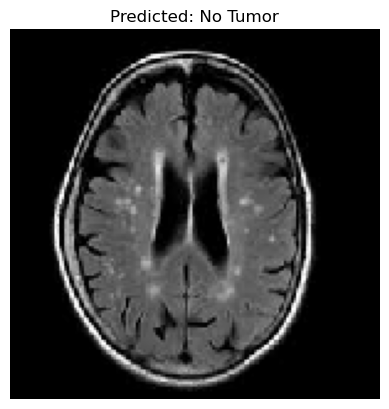

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Prediction for 50 no.jpg: 0.10480569303035736


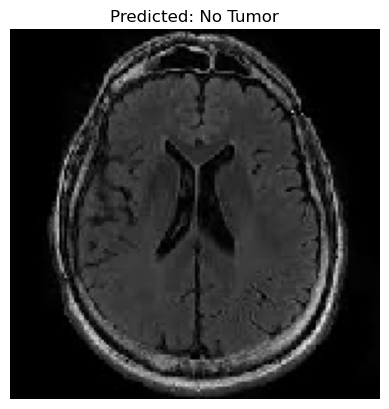

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Prediction for N3.jpg: 0.0011781237553805113


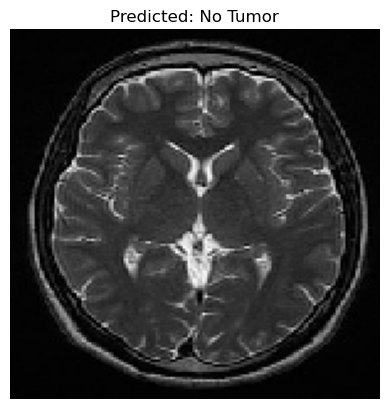

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Prediction for Y35.jpg: 0.9827715158462524


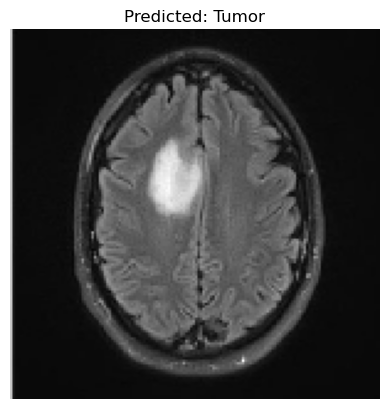

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Prediction for Y4.jpg: 0.9800061583518982


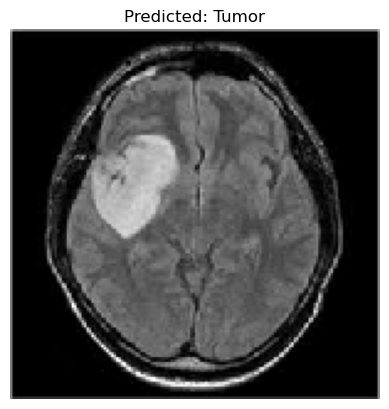

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
Prediction for Y53.jpg: 0.8424199819564819


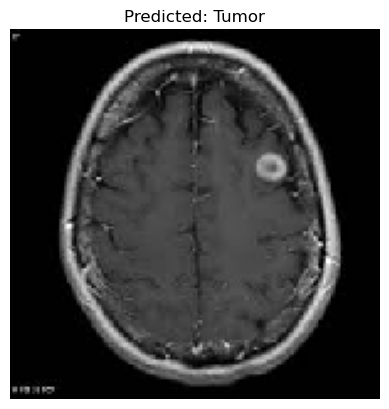

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Prediction for Y58.JPG: 0.9916939735412598


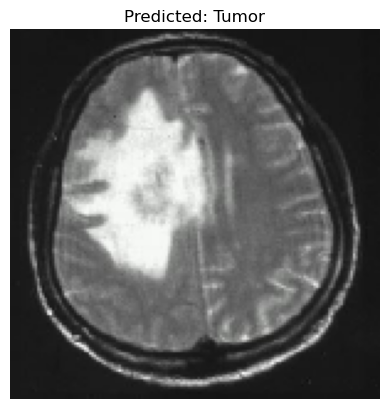

In [15]:
img_dir = 'D:\\brain_tumor_dataset'
img_size = (150, 150)

for img_name in os.listdir(img_dir):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(img_dir, img_name)
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        prediction = model.predict(img_array)
        print(f"Prediction for {img_name}: {prediction[0][0]}")

        # Show the image with predicted label
        plt.imshow(img)
        plt.title(f"Predicted: {'Tumor' if prediction[0][0] > 0.7 else 'No Tumor'}")
        plt.axis('off')
        plt.show()

        #result = "Tumor detected" if prediction[0][0] > 0.5 else "No tumor detected"
        #print(f"{img_name}: {result}")
